In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv(r'Data_sets\Diet_Dataset.csv')

In [6]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,1,1,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Avocados,1,0,0,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,1,0,0,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,1,1,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,1,1,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     231 non-null    object 
 1   Breakfast      231 non-null    int64  
 2   Lunch          231 non-null    int64  
 3   Dinner         231 non-null    int64  
 4   VegNovVeg      231 non-null    int64  
 5   Junk Food      231 non-null    int64  
 6   Calories       231 non-null    int64  
 7   Fats           231 non-null    float64
 8   Proteins       231 non-null    float64
 9   Iron           231 non-null    float64
 10  Calcium        231 non-null    float64
 11  Sodium         231 non-null    float64
 12  Potassium      231 non-null    float64
 13  Carbohydrates  231 non-null    float64
 14  Fibre          231 non-null    float64
 15  VitaminD       231 non-null    float64
 16  Sugars         231 non-null    float64
 17  Link           231 non-null    object 
dtypes: float64

In [9]:
print(df.isnull().sum().sort_values(ascending=False))

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
VegNovVeg        0
Junk Food        0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
Link             0
dtype: int64


In [10]:
df.duplicated().sum()

np.int64(0)

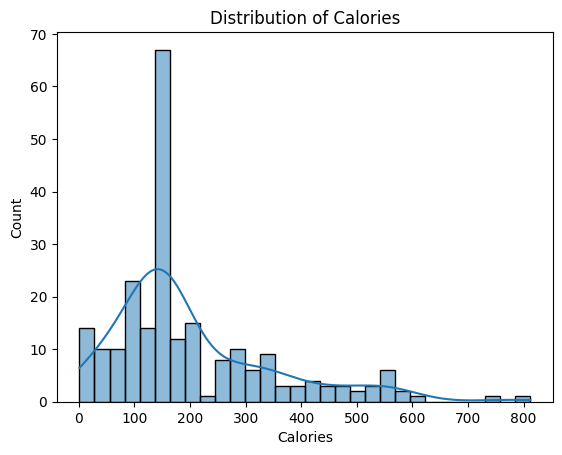

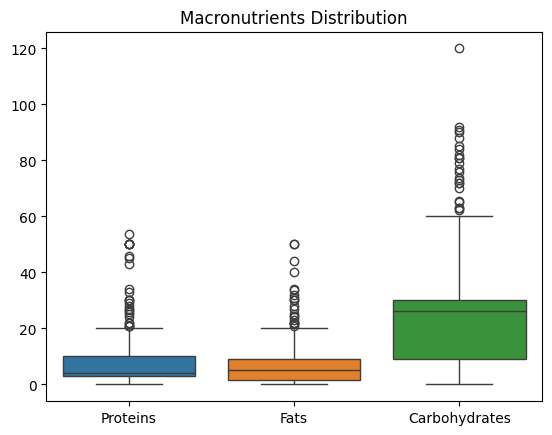

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.show()


sns.boxplot(data=df[['Proteins','Fats','Carbohydrates']])
plt.title('Macronutrients Distribution')
plt.show()

In [15]:
def categorize_nutrition(row):
    if row['Proteins'] >row['Carbohydrates'] and row['Proteins'] > row['Fats']:
        return 'High-Protein'
    elif row['Carbohydrates'] > row['Proteins'] and row['Carbohydrates'] > row['Fats']:
        return 'High-Carb'
    elif row['Fats'] > row['Proteins'] and row['Fats'] > row['Carbohydrates']:
        return 'High-Fat'
    else:
        return 'Balanced'
df['Nutrition_Type'] = df.apply(categorize_nutrition, axis=1)

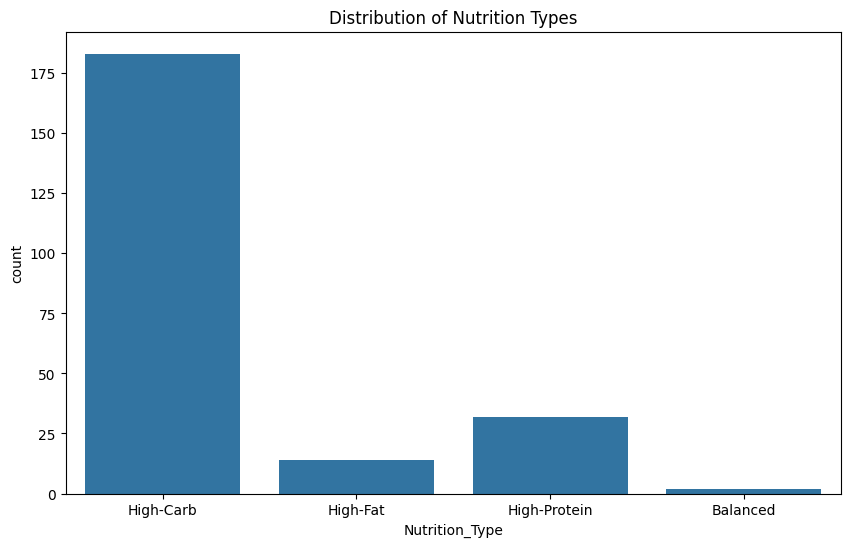

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Nutrition_Type')
plt.title('Distribution of Nutrition Types')
plt.show()